CE888 Assignment-2

Installing and importing basic EDA library

In [43]:
!pip install basic_image_eda
from basic_image_eda import BasicImageEDA

Connecting GDrive for data import and save model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading Data from drive

In [ ]:
!cp "/content/gdrive/MyDrive/DS_Assignment/Test.zip" "/content/"
!unzip "/content/Test.zip"
!rm -rf "/content/Test.zip" 

!cp "/content/gdrive/MyDrive/DS_Assignment/Trainning.zip" "/content/"
!unzip "/content/Trainning.zip"
!rm -rf "/content/Trainning.zip"

Importing libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.applications import Xception

Configuration setting - please change paths if necessary

In [12]:
train_dir = "/content/Trainning/"
test_dir = "/content/Test/"
train_refined_dir = "/content/Training_refined/"

IMG_SIZE = 254
NB_CHANNELS = 3
BATCH_SIZE = 8

os.mkdir(train_refined_dir)
os.mkdir(os.path.join(train_refined_dir,"Fire"))
os.mkdir(os.path.join(train_refined_dir,"No_Fire"))

Checking class distribution for training and test

In [8]:
train_dir_fire = os.listdir(os.path.join(train_dir,"Fire"))
train_dir_nofire = os.listdir(os.path.join(train_dir,"No_Fire"))
test_dir_fire = os.listdir(os.path.join(test_dir,"Fire"))
test_dir_nofire = os.listdir(os.path.join(test_dir,"No_Fire"))

print("Number of images in Fire class in train set:\t", len(train_dir_fire))
print("Number of images in No Fire class in train set:\t", len(train_dir_nofire))
print("Number of images in Fire class in test set:\t", len(test_dir_fire))
print("Number of images in No Fire class in test set:\t", len(test_dir_nofire))

Number of images in Fire class in train set:	 25018
Number of images in No Fire class in train set:	 14357
Number of images in Fire class in test set:	 5137
Number of images in No Fire class in test set:	 3480


Basic EDA parameters

In [46]:
extensions = ['jpg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

Performing Basic EDA for Train Fire and No Fire set


found 25018 images.


  0%|          | 6/25018 [00:00<07:57, 52.35it/s]

Using 2 threads. (max:2)



100%|██████████| 25018/25018 [03:21<00:00, 124.05it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  25018

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  254
max height                               |  254
mean height                              |  254.0
median height                            |  254

min width                                |  254
max width                                |  254
mean width                               |  254.0
median width                             |  254

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)          |  [256 256] (h x w, mul

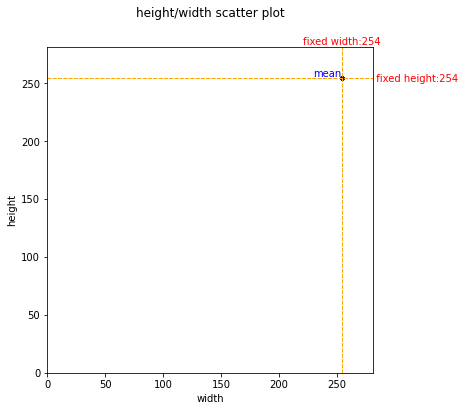

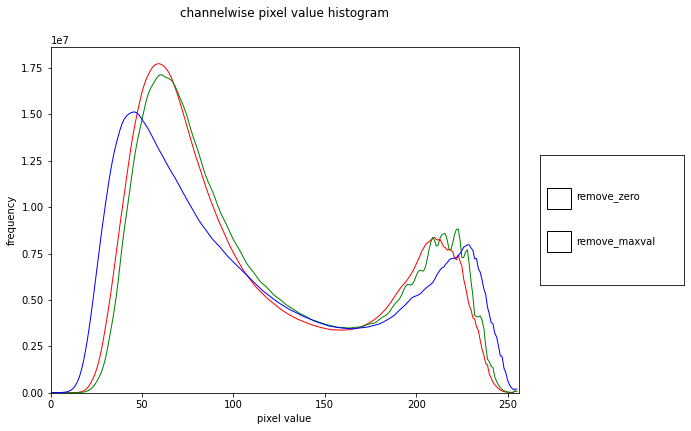

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 254,
 'max_w': 254,
 'mean': array([0.43880707, 0.4536221 , 0.43861967], dtype=float32),
 'mean_h': 254.0,
 'mean_hw_ratio': 1.0,
 'mean_w': 254.0,
 'median_h': 254,
 'median_hw_ratio': 1.0,
 'median_w': 254,
 'min_h': 254,
 'min_w': 254,
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'rec_hw_size_8': array([256, 256]),
 'std': array([0.2437108, 0.243635 , 0.2669139], dtype=float32)}

In [47]:
BasicImageEDA.explore(train_dir+"Fire/", extensions, 
                      threads, dimension_plot, channel_hist, nonzero, hw_division_factor)


found 14357 images.


  0%|          | 0/14357 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 14357/14357 [01:52<00:00, 128.13it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  14357

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  254
max height                               |  254
mean height                              |  254.0
median height                            |  254

min width                                |  254
max width                                |  254
mean width                               |  254.0
median width                             |  254

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)          |  [256 256] (h x w, mul

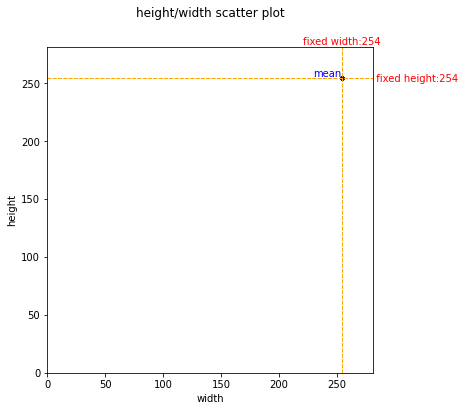

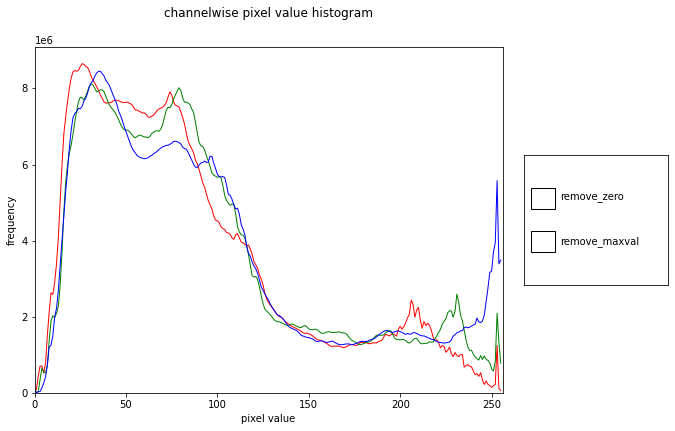

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 254,
 'max_w': 254,
 'mean': array([0.3278703 , 0.3529132 , 0.37128618], dtype=float32),
 'mean_h': 254.0,
 'mean_hw_ratio': 1.0,
 'mean_w': 254.0,
 'median_h': 254,
 'median_hw_ratio': 1.0,
 'median_w': 254,
 'min_h': 254,
 'min_w': 254,
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'rec_hw_size_8': array([256, 256]),
 'std': array([0.22265129, 0.23377082, 0.2555215 ], dtype=float32)}

In [48]:
BasicImageEDA.explore(train_dir+"No_Fire/", extensions, 
                      threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

Performing Basic EDA for Train Fire and No Fire set


found 5137 images.


  0%|          | 0/5137 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 5137/5137 [00:42<00:00, 120.75it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  5137

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  254
max height                               |  254
mean height                              |  254.0
median height                            |  254

min width                                |  254
max width                                |  254
mean width                               |  254.0
median width                             |  254

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)          |  [256 256] (h x w, mult

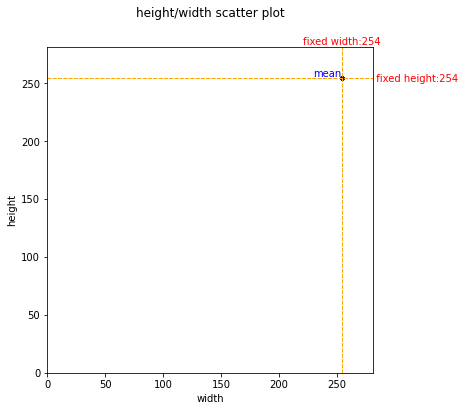

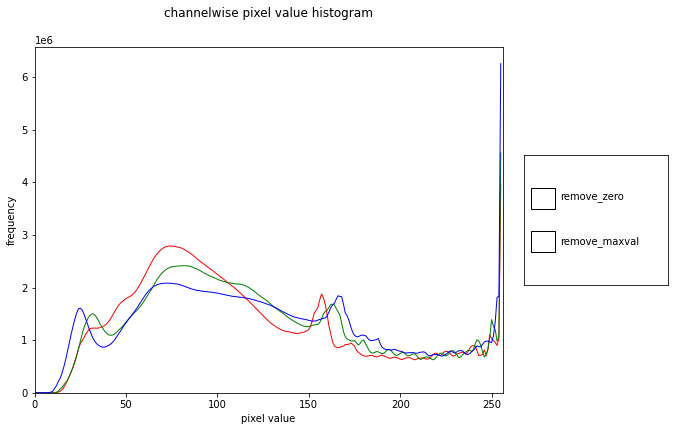

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 254,
 'max_w': 254,
 'mean': array([0.45841643, 0.47888604, 0.49059054], dtype=float32),
 'mean_h': 254.0,
 'mean_hw_ratio': 1.0,
 'mean_w': 254.0,
 'median_h': 254,
 'median_hw_ratio': 1.0,
 'median_w': 254,
 'min_h': 254,
 'min_w': 254,
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'rec_hw_size_8': array([256, 256]),
 'std': array([0.24055931, 0.2416837 , 0.25279763], dtype=float32)}

In [49]:
BasicImageEDA.explore(test_dir+"Fire/", extensions, 
                      threads, dimension_plot, channel_hist, nonzero, hw_division_factor)


found 3480 images.


  0%|          | 0/3480 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 3480/3480 [00:29<00:00, 119.71it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  3480

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  254
max height                               |  254
mean height                              |  254.0
median height                            |  254

min width                                |  254
max width                                |  254
mean width                               |  254.0
median width                             |  254

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)          |  [256 256] (h x w, mult

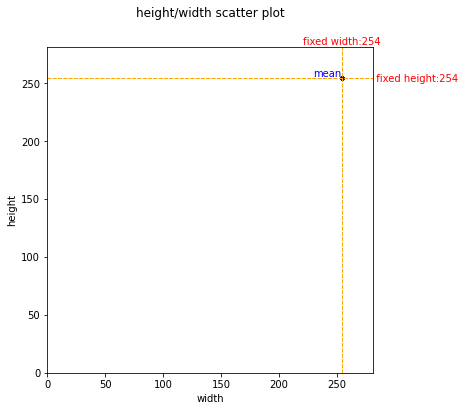

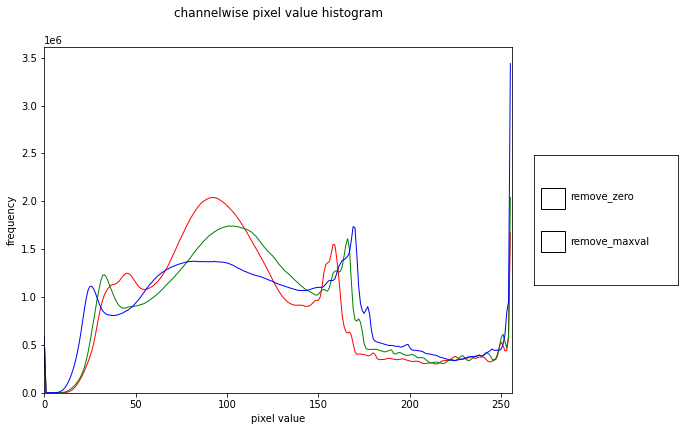

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 254,
 'max_w': 254,
 'mean': array([0.44145972, 0.46272737, 0.47164822], dtype=float32),
 'mean_h': 254.0,
 'mean_hw_ratio': 1.0,
 'mean_w': 254.0,
 'median_h': 254,
 'median_hw_ratio': 1.0,
 'median_w': 254,
 'min_h': 254,
 'min_w': 254,
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'rec_hw_size_8': array([256, 256]),
 'std': array([0.2177887 , 0.22263253, 0.24002513], dtype=float32)}

In [50]:
BasicImageEDA.explore(test_dir+"No_Fire/", extensions, 
                      threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

Defining OpenCV based baseline model

In [9]:
lower = [0, 100, 100]
upper = [35, 255, 255]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

def display(imgage, img_name):
    plt.figure(figsize=(15,10))
    plt.imshow(imgage)                                                                       
    plt.title(img_name)
    plt.show()
    
def baseline_model(input_path, flag=False):
    img_bgr = cv2.imread(input_path)
    img_blur = cv2.GaussianBlur(img_bgr.copy(), (1,1), 10)
    img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
    
    if flag:
        img_hsv[:,:,2] += 50

    mask = cv2.inRange(img_hsv, lower, upper)

    if np.any(mask):
        return 1
    return 0

In [13]:
train_fire = os.listdir(train_dir+"Fire/")
train_no_fire = os.listdir(train_dir+"No_Fire/")
file_path= []
types =[]

for i in train_fire:
    inp_path = train_dir+"Fire/"+i
    if (baseline_model(inp_path, flag=True)):
        file_path.append(inp_path)
        types.append('Fire')

for i in train_no_fire:
    inp_path = train_dir+"No_Fire/"+i
    if ~baseline_model(inp_path):
        file_path.append(inp_path)
        types.append('No_Fire')

Dataframe to capture true Fire and No Fire images

In [14]:
df = pd.DataFrame(data={'file_path':file_path, 'type':types})

Copy rightly labelled Fire and No Fire images in training refined folder.

In [15]:
import shutil
for i in (df['file_path'].values):
    if 'No_Fire' in i:
        shutil.copy(i, os.path.join(train_refined_dir,"No_Fire"))
    else:
        shutil.copy(i, os.path.join(train_refined_dir,"Fire"))

In [16]:
train_refined_dir_fire = os.listdir(os.path.join(train_refined_dir,"Fire"))
train_refined_dir_nofire = os.listdir(os.path.join(train_refined_dir,"No_Fire"))

print("Number of images in Fire class in refined train set:\t", len(train_refined_dir_fire))
print("Number of images in No Fire class in refined train set:\t", len(train_refined_dir_nofire))

Number of images in Fire class in refined train set:	 23664
Number of images in No Fire class in refined train set:	 14357


Image Augmentations on training_refined dataset

In [17]:
train_datagen = ImageDataGenerator(
                                   rescale=1.0/255.0, 
                                   rotation_range=180, 
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   zoom_range=0.1,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   fill_mode="nearest",
                                   validation_split=0.2
                                  )

train_generator = train_datagen.flow_from_directory(train_refined_dir, 
                                  batch_size=BATCH_SIZE,
                                  target_size=(IMG_SIZE,IMG_SIZE),
                                  color_mode="rgb",
                                  shuffle = True,
                                  class_mode='binary',
                                  subset='training'
                              )
validation_generator = train_datagen.flow_from_directory(train_refined_dir, 
                                  batch_size=BATCH_SIZE,
                                  target_size=(IMG_SIZE,IMG_SIZE),
                                  color_mode="rgb",
                                  shuffle = True,
                                  class_mode='binary',
                                  subset='validation'                
                                )

Found 30418 images belonging to 2 classes.
Found 7603 images belonging to 2 classes.


Image generator for test data with no augmentations

In [18]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                  batch_size=BATCH_SIZE,
                                  target_size=(IMG_SIZE,IMG_SIZE),
                                  color_mode="rgb",
                                  shuffle = False,
                                  class_mode='binary'
                              )

Found 8617 images belonging to 2 classes.


verifying class indices

In [19]:
test_generator.class_indices

{'Fire': 0, 'No_Fire': 1}

verifying train_generator samples

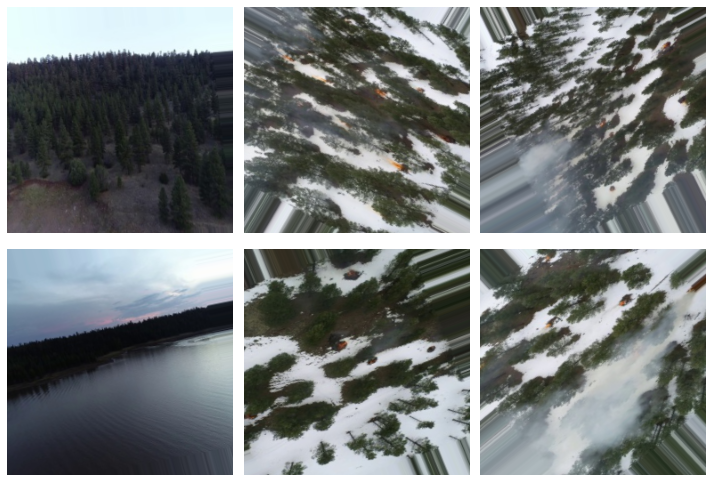

[1. 0. 0. 1. 0. 0. 1. 0.]


In [24]:
def plotimages(images_arr):
    fix, axes = plt.subplots(2, 3, figsize=(10,7))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

imgs, labels = next(train_generator)
plotimages(imgs)
print(labels)

Loading pretrained Xception model

In [ ]:
input = Input(shape=(IMG_SIZE,IMG_SIZE,3))
pretrained = Xception(include_top=False, weights='imagenet', input_tensor=input)
output = pretrained.layers[-1].output
output = keras.layers.Flatten()(output)
pretrained = Model(pretrained.input, output)
pretrained.summary()

Adding output layers to the pretrained model

In [26]:
last_layer = pretrained.layers[-1].output
x = Dropout(0.5, name='dp1')(last_layer)
x = Dense(2048, activation='relu', name='fc1')(x)
output = Dense(1, activation='sigmoid', name='output')(x)
model = Model(input, output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 254, 254, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 126, 126, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 126, 126, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 126, 126, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

Freezing entry dlow for the Xception model

In [28]:
for layer in model.layers[:-102]:
    layer.trainable = False

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#print number of trainable layers
count =0 
for layer in model.layers:
    if layer.trainable:
        count+=1
print("Number of trainnable layers:\t", count)

Number of trainnable layers:	 102


Defining callbacks Early stopping and Model Check point

In [ ]:
callbacks = [EarlyStopping(patience=10, min_delta = 0.01, verbose=1, monitor='val_accuracy', mode='max'),
             ModelCheckpoint(filepath='/content/gdrive/MyDrive/tl_best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)]
history = model.fit(train_generator, 
                              epochs=100,
                              validation_data=test_generator, 
                              verbose=1,
                              callbacks=callbacks)

Plotting history for training and validation progress

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loading saved model

In [30]:
model = keras.models.load_model('/content/gdrive/MyDrive/tl_best_model.h5')

Predicting results for test dataset

In [31]:
predictions = (model.predict(test_generator, verbose=1) > 0.5).astype("int64")

1078/1078 [==============================] - 2268s 2s/step


Evaluating model

In [42]:
score = model.evaluate(test_generator, verbose=1)
print("Test Accuracy = ", score[1])

1078/1078 [==============================] - 2272s 2s/step - loss: 0.3120 - accuracy: 0.8869
Test Accuracy =  0.8868515491485596


In [32]:
labels=(test_generator.classes)
cm = confusion_matrix(labels, predictions.ravel())
cr = classification_report(labels, predictions.ravel())

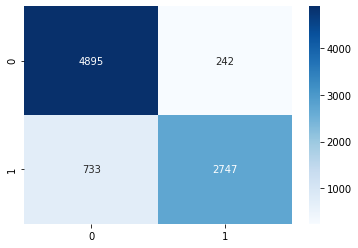

In [38]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues');

In [39]:
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5137
           1       0.92      0.79      0.85      3480

    accuracy                           0.89      8617
   macro avg       0.89      0.87      0.88      8617
weighted avg       0.89      0.89      0.89      8617

